<a href="https://colab.research.google.com/github/tarapandey/Analyzing-The-Impact-of-COVID-19-on-Education/blob/main/Impact_of_COVID_19_on_Education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports our drive which contains all our datasets

# Compares US Math Achievement Tests scores of 2018-19 vs 2020-21

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
iPISA2000_2019 = 'OECD PISA data.csv'
df1 = pd.read_csv(iPISA2000_2019)

worldCOVID = 'worldometer_data.csv'
df2 = pd.read_csv(worldCOVID)

country_codes = 'countries_iso3166b.csv'
df3 = pd.read_csv(country_codes, encoding='latin-1')

PISA_2018_2022 = 'PISA 2018 to 2022.xlsx'
df4 = pd.read_excel(PISA_2018_2022)

FileNotFoundError: [Errno 2] No such file or directory: 'OECD PISA data.csv'

In [ ]:
#Convert column method, changes countries in international COVID data to country codes
def convert_column(df, search, retrieve, conversion_df, first, sec):
  conversion = dict(zip(conversion_df[first], conversion_df[sec]))

  df[retrieve] = df[search].map(conversion)

search = 'Country/Region'
retrieve = 'new'
first = 'country_common'
sec = 'iso3'

convert_column(df2, search, retrieve, df3, first, sec)

#Checks the 'new' column in the data frame for all NaN values and then creates a variable for the count of all the NaNs
nan = df2[df2['new'].isna()]
num_nan = df2['new'].isna().sum()

print("Number of NaN values in the 'new' column:", num_nan)
#used to identify which 'Country/Region' values need to be hard coded to a country code
print("Information for rows with NaN values in the 'new' column")
print(nan)

#Dict to hard code the 'Country/Region' values that aren't in the 'country_common' row of the d3 dataframe to country codes
mapping_dict = {
    'USA': 'USA',
    'Russia': 'RUS',
    'UK': 'GBR',
    'UAE': 'ARE',
    'Ivory Coast' : 'CIV',
    'S. Korea' : 'KOR',
    'North Macedonia': 'MKD',
    'DRC': 'COD',
    'CAR': 'CAF',
    'Syria': 'SYR',
    'Vietnam' : 'VNM',
    'Diamond Princess' : 'GBR','USA': 'USA',
    'Réunion': 'FRA',
    'Channel Islands': 'GGY',
    'Faeroe Islands': 'DNK',
    'Brunei ' : 'BRN',
    'Turks and Caicos' : 'TCA',
    'St. Vincent Grenadines': 'VCT',
    'Curaçao': 'CUW',
    'Caribbean Netherlands': 'NLD',
    'Vatican City': 'VAT',
}
#For the Country/Regions that return a NaN in new, maps the values to a country code in the 'new' column instead
map = df2['Country/Region'].isin(mapping_dict.keys())
df2.loc[map, 'new'] = df2.loc[map, 'Country/Region'].map(mapping_dict)
#Check the nan values in the 'new' column again
nan = df2[df2['new'].isna()]
num_nan = df2['new'].isna().sum()
#Comes out as an empty dict, meaning there are no nan values left in the 'new' column
print("Number of NaN values in the new column:", num_nan)

print("Corrected Rows with NaN values in the new column:")
print(nan)

# Check the conversion dictionary
print("Conversion Dictionary:")
print(df3)

# Check the DataFrame after applying the conversion function
print("DataFrame after conversion:")
print(df2)

Number of NaN values in the 'new' column: 21
Information for rows with NaN values in the 'new' column
             Country/Region      Continent   Population  TotalCases  NewCases  \
0                       USA  North America  331198130.0     5032179       NaN   
3                    Russia         Europe  145940924.0      871894       NaN   
11                       UK         Europe   67922029.0      308134       NaN   
38                      UAE           Asia    9902079.0       61845       NaN   
71              Ivory Coast         Africa   26437950.0       16447       NaN   
72                 S. Korea           Asia   51273732.0       14519      20.0   
79          North Macedonia         Europe    2083365.0       11399       NaN   
82                      DRC         Africa   89802183.0        9309       NaN   
102                     CAR         Africa    4837752.0        4620       NaN   
145                   Syria           Asia   17539600.0         999       NaN   
154    

In [ ]:
#Sorting the data frame by COVID cases and deaths
df2['cases'] = df2['Tot Cases/1M pop'].rank(method = 'min', ascending = False)
df2['deaths'] = df2['Deaths/1M pop'].rank(method = 'min', ascending = False)

#Sorting the data frame by COVID cases/pop
df2_sorted_cases = df2.sort_values(by='Tot Cases/1M pop', ascending=False)
print("Ranked by cases:")
sorted_cases = ['cases', 'Tot Cases/1M pop', 'Country/Region']
print("Print case/pop ranking:")
print(df2_sorted_cases[sorted_cases])

#Sorting the data frame by COVID deaths/pop
df2_sorted_deaths = df2.sort_values(by='Deaths/1M pop', ascending=False)
print("Ranked by deaths:")
sorted_deaths = ['deaths', 'Deaths/1M pop', 'Country/Region']
print("Print death/pop ranking:")
print(df2_sorted_deaths[sorted_deaths])

#Adds cases+deaths ranking so the countries with most cases and deaths combined are evaluated (visual for which countries were most affected)
df2['cases+deaths'] = df2['cases'] + df2['deaths']
df2_new_sort = df2.sort_values(by='cases+deaths', ascending=True)
print("Print cases+deaths ranking:")
sorted_cases_and_deaths = ['cases+deaths', 'Country/Region', 'cases', 'Tot Cases/1M pop', 'deaths', 'Deaths/1M pop']
print(df2_new_sort[sorted_cases_and_deaths])

Ranked by cases:
Print case/pop ranking:
     cases  Tot Cases/1M pop    Country/Region
24     1.0           39922.0             Qatar
84     2.0           27146.0     French Guiana
47     3.0           25130.0           Bahrain
157    4.0           20596.0        San Marino
7      5.0           19165.0             Chile
..     ...               ...               ...
154  205.0               8.0           Vietnam
161  205.0               8.0          Tanzania
165  207.0               7.0           Myanmar
200  208.0               3.0              Laos
156    NaN               NaN  Diamond Princess

[209 rows x 3 columns]
Ranked by deaths:
Print death/pop ranking:
     deaths  Deaths/1M pop         Country/Region
157     1.0         1238.0             San Marino
35      2.0          850.0                Belgium
11      3.0          683.0                     UK
148     4.0          673.0                Andorra
6       5.0          619.0                   Peru
..      ...            ...  

In [ ]:
#Creates data frames that splits df1 into the oldest data collected for each country and the most recent
mostrecentdf1 = pd.DataFrame(df1)
mostrecentdf1 = mostrecentdf1.sort_values(by='LOCATION')

oldestdf1 = pd.DataFrame(df1)
oldestdf1 = oldestdf1.sort_values(by='LOCATION')

# Group by 'Group' column and get the maximum value for each group
max = mostrecentdf1.groupby('LOCATION')['TIME'].transform('max')
min = mostrecentdf1.groupby('LOCATION')['TIME'].transform('min')

# Filter the DataFrame to only rows where the value equals the maximum value for that group
recent = mostrecentdf1[mostrecentdf1['TIME'] == max]
oldest = oldestdf1[oldestdf1['TIME'] == min]

# Print the result

recent_unique = recent.drop_duplicates(subset='LOCATION')
recent_avgs = recent.groupby('LOCATION')['Value'].mean().reset_index()

# Merge the average values back into the original DataFrame
recent_unique = recent_unique.merge(recent_avgs, on='LOCATION', suffixes=('', '_avg'))
df1_2015 = recent_unique[recent_unique['TIME']==2015]
print('Print 2015')
print(df1_2015)

#Ignore the countries that only had data from one year (manually checked for this in the data set)
ignore = ['CRI', 'LTU', 'HKG', 'MAC', 'PER', 'SGP', 'TWN', 'OAVG']

recent_unique = recent_unique[~recent_unique['LOCATION'].isin(ignore)]
print(recent_unique)

old_unique = oldest.drop_duplicates(subset='LOCATION')
oldest_avgs = oldest.groupby('LOCATION')['Value'].mean().reset_index()

oldest_unique = old_unique.merge(oldest_avgs, on='LOCATION', suffixes=('', '_avg'))
oldest_unique = oldest_unique[~oldest_unique['LOCATION'].isin(ignore)]
print(oldest_unique)

#Rename and create new columns
df_tot = recent_unique
df_tot = df_tot.rename(columns = {'TIME' : 'RECENT'})
df_tot = df_tot.rename(columns = {'Value' : 'Rec Value'})
df_tot['OLD'] = oldest_unique['TIME']
df_tot['Old Value'] = oldest_unique['Value']
df_tot['Dif'] = df_tot['Rec Value'] - df_tot['Old Value']
print(df_tot)

Print 2015
    index LOCATION    INDICATOR SUBJECT  TIME  Value   Value_avg
18   1468      HKG     PISAREAD     TOT  2015  527.0  532.777778
30    692      MAC     PISAMATH     BOY  2015  540.0  527.222222
36   1473      PER     PISAREAD    GIRL  2015  401.0  393.777778
40   2074      SGP  PISASCIENCE     TOT  2015  556.0  551.666667
45   2075      TWN  PISASCIENCE     TOT  2015  532.0  523.888889
    index LOCATION    INDICATOR SUBJECT  TIME  Value   Value_avg
0     706      AUS     PISAREAD     BOY  2018  487.0  499.000000
1     725      AUT     PISAREAD    GIRL  2018  499.0  491.111111
2     732      BEL     PISAREAD     BOY  2018  482.0  499.888889
3    2020      BRA  PISASCIENCE     TOT  2018  404.0  400.111111
4    1885      CAN  PISASCIENCE     TOT  2018  518.0  516.777778
5     321      CHE     PISAMATH    GIRL  2018  512.0  498.222222
6    1799      CHL  PISASCIENCE     BOY  2018  445.0  437.666667
7    2065      COL  PISASCIENCE     BOY  2018  420.0  405.444444
9    1529     

                      Unnamed: 0   Math Mean   Read Mean  Science Mean  \
0                   OECD average  472.357650  475.588199    484.645525   
1                      Singapore  574.663820  542.553322    561.433275   
2                          Japan  535.579306  515.854614    546.634454   
3                          Korea  527.302502  515.415392    527.822418   
4                        Estonia  509.946953  511.030332    525.811778   
..                           ...         ...         ...           ...   
77  Ukrainian regions (18 of 27)  440.845309  427.526953    450.187238   
78                        Cyprus  418.306680  381.075724    410.902517   
79             Baku (Azerbaijan)  396.882293  365.213858    380.143687   
80         Palestinian Authority  365.746676  349.157050    368.815095   
81                        Kosovo   72.947292   72.947292     72.947292   

   Score dif. Score dif..1 Score dif..2 Math Score dif. Read Score dif.  \
0   -7.325905    -3.680684    -7.293

<ipython-input-17-1fa3603809d7>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['Year'] = '2018'
<ipython-input-17-1fa3603809d7>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Year'] = '2022'


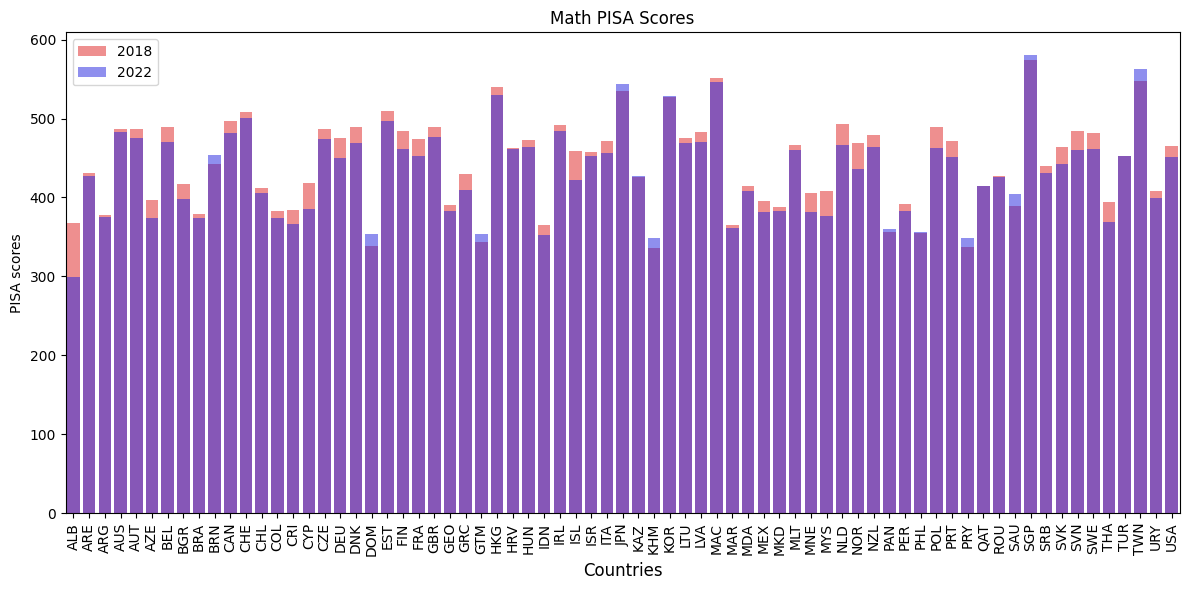

<ipython-input-17-1fa3603809d7>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['Year'] = '2018'
<ipython-input-17-1fa3603809d7>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Year'] = '2022'


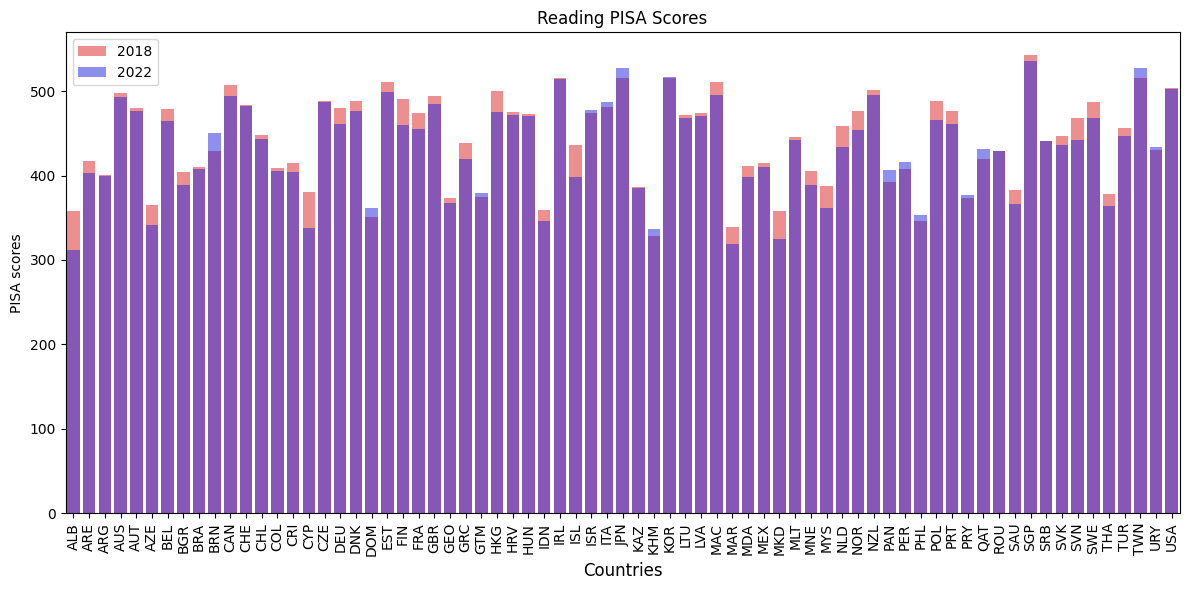

<ipython-input-17-1fa3603809d7>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['Year'] = '2018'
<ipython-input-17-1fa3603809d7>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Year'] = '2022'


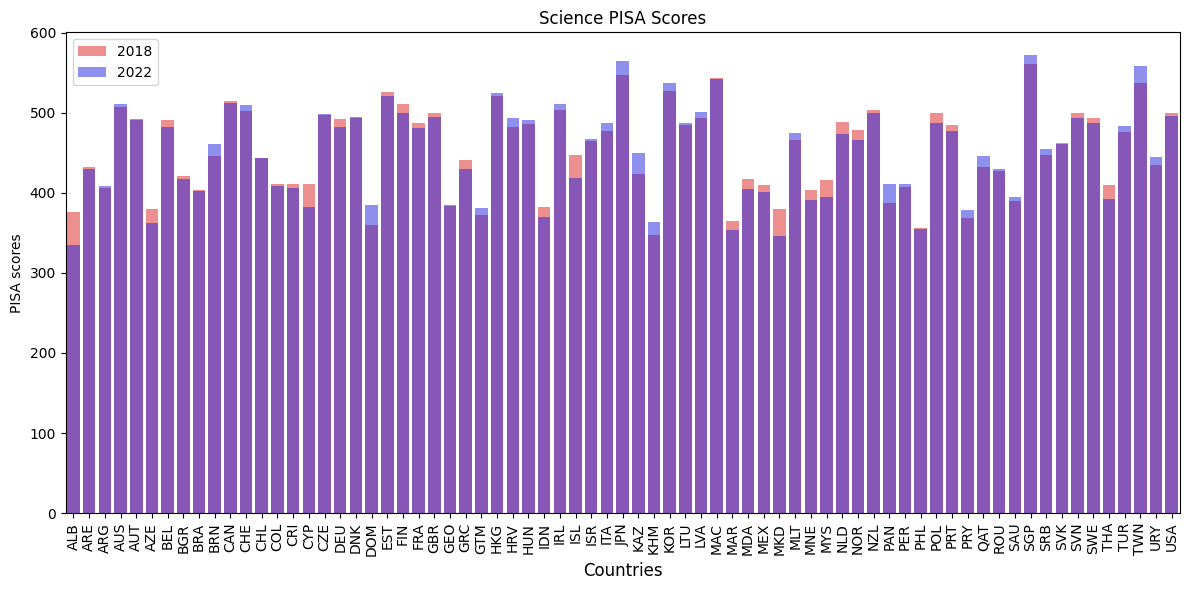

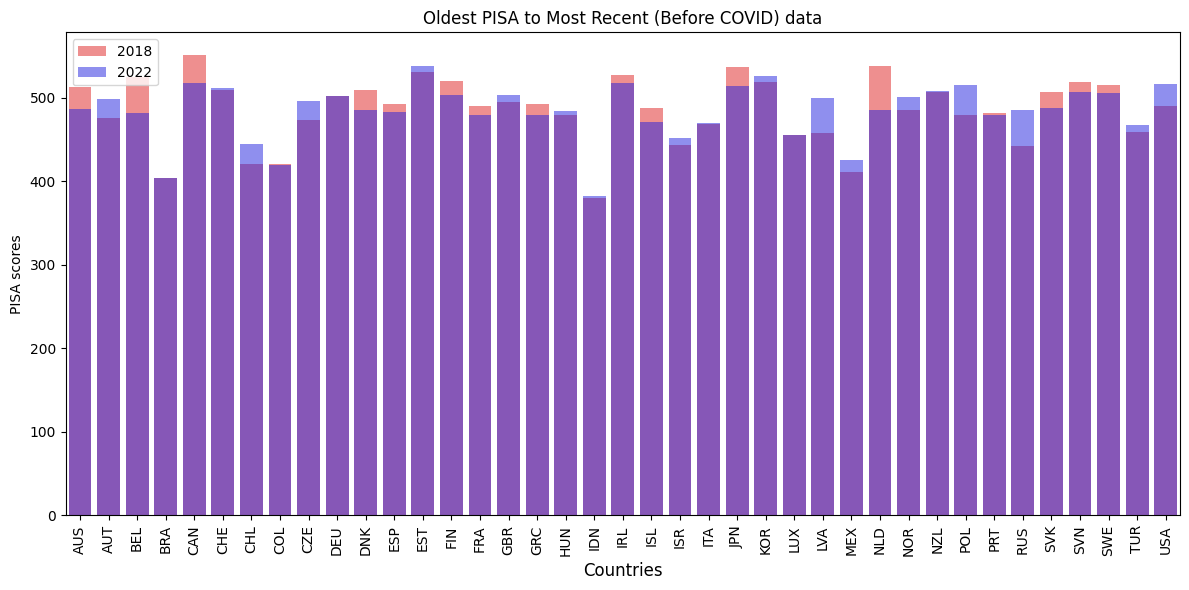

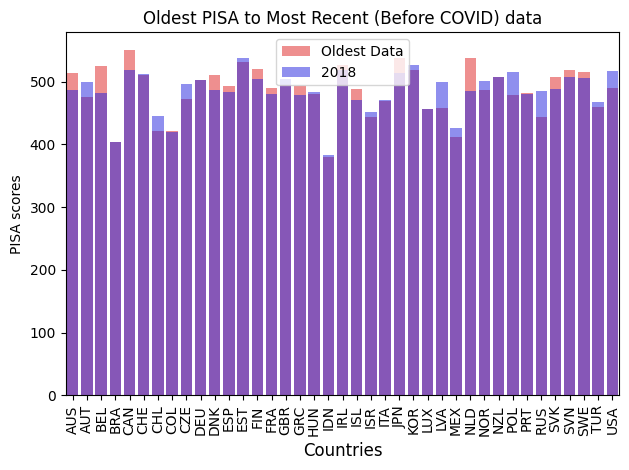

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df4)

#Creates a bar plot for each section of the PISA test that maps the difference in scores from the oldest recorded year with data to the most recent (accoridng to this dataset with values between 2000 and 2018)
df4['Math Score dif.'] = pd.to_numeric(df4['Math Score dif.'], errors='coerce')
df4['Read Score dif.'] = pd.to_numeric(df4['Read Score dif.'], errors='coerce')
df4['Science Score dif.'] = pd.to_numeric(df4['Science Score dif.'], errors='coerce')

#Drops null values
filtered = df4[df4['Math Score dif.'].notnull()]
filtered = df4[df4['Read Score dif.'].notnull()]
filtered = df4[df4['Science Score dif.'].notnull()]
filtered = filtered.drop(index=0)

#Creates a function that changes all the country names in the data set to just the country name before the `*` character (was included in some country names that satisfied a certain condiiton clarified later in the data set)
def convert(df, column, character):

    df[column] = df[column].str.split(character).str[0]
    return df

filtered = convert(filtered, 'Unnamed: 0', '*')

print(filtered)

search = 'Unnamed: 0'
retrieve = 'codes'
first = 'country_common'
sec = 'iso3'

#Calls on the convert_column function from earlier that converts country names to country codes
convert_column(filtered, search, retrieve, df3, first, sec)

print(filtered)

nan = filtered[filtered['codes'].isna()]
num_nan = filtered['codes'].isna().sum()

print("Number of NaN values in the 'new' column:", num_nan)
#used to identify which 'Country/Region' values need to be hard coded to a country code
print("Information for rows with NaN values in the 'new' column")
print(nan)


#Dict to hard code the 'Unnamed: 0' values that aren't in the 'country_common' row of the d3 dataframe to country codes
mapping_dict = {
    'Korea': 'KOR',
    'Czech Republic': 'CZE',
    'United States': 'USA',
    'Slovak Republic': 'SVK',
    'Türkiye' : 'TUR',
    'North Macedonia': 'MKD',
    'Macao (China)': 'MAC',
    'Chinese Taipei': 'TWN',
    'Hong Kong (China)': 'HKG',
    'Baku (Azerbaijan)' : 'AZE',
    'Kosovo' : 'XKS',
}
# #For the Country/Regions that return a NaN in new, maps the values to a country code in the 'new' column instead
map = filtered['Unnamed: 0'].isin(mapping_dict.keys())
filtered.loc[map, 'codes'] = filtered.loc[map, 'Unnamed: 0'].map(mapping_dict)
print(filtered)
#Check the nan values in the 'new' column again
nan = filtered[filtered['codes'].isna()]
num_nan = filtered['codes'].isna().sum()
print(num_nan)

countries = filtered['codes']
filtered = filtered.sort_values(by='codes')

#Creates a graph function so the math, reading, and science scores can all be mapped in a separate graph without rewriting the code for them every time
def graph(df4, column1, column2, column3, title1):
  dfnew = df4
#Creates a new data set that evaluates what the values in 2018 would be based off the 2022 data and the data for the difference between years
  dfnew['difference'] = df4[column1] + df4[column2]
  dfnew['countries'] = df4[column3]

#Ignores the data from Kosovo because it was inaccurate
  ignore = ['XKS']
  dfnew = dfnew[~dfnew[column3].isin(ignore)]
  df4 = df4[~df4[column3].isin(ignore)]

#Uses data from two data frames in order to map changes overtime
  dfnew['Year'] = '2018'
  df4['Year'] = '2022'

 #Creates graphs that are bar plots laid on top of each other with data from 2018 to 2022
  combined_df = pd.concat([dfnew, df4])

  plt.figure(figsize=(12, 6))

  sns.barplot(data=dfnew, x='countries', y=column1, color='red', alpha=0.5, label='2018')

  sns.barplot(data=df4, x=column3, y='difference', color='blue', alpha=0.5, label='2022')

  plt.xticks(rotation=90)
  plt.legend()
  plt.xlabel('Countries', fontsize = 12)
  plt.ylabel('PISA scores')
  plt.title(title1)
  plt.tight_layout()
  plt.show()

#Data frame using data from 2000 to 2018 data frame (doesn't include distributions for Math, Reading, and Science so only creates one bar graph)
df_tot = df_tot.sort_values(by='LOCATION')

#Calls the graph function for each plot
graph(filtered, 'Math Mean', 'Math Score dif.', 'codes', 'Math PISA Scores')
graph(filtered, 'Read Mean', 'Read Score dif.', 'codes', 'Reading PISA Scores')
graph(filtered, 'Science Mean', 'Science Score dif.', 'codes', 'Science PISA Scores')
graph(df_tot, 'Old Value', 'Dif', 'LOCATION', 'Oldest PISA to Most Recent (Before COVID) data')
sns.barplot(data=df_tot, x='LOCATION', y='Old Value', color='red', alpha=0.5, label='Oldest Data')
sns.barplot(data=df_tot, x='LOCATION', y='Rec Value', color='blue', alpha=0.5, label='2018')
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Countries', fontsize = 12)
plt.ylabel('PISA scores')
plt.title('Oldest PISA to Most Recent (Before COVID) data')
plt.tight_layout()
plt.show()

              Unnamed: 0   Math Mean   Read Mean  Science Mean Score dif.  \
62               Albania  368.221720  358.434758    375.967751   4.288532   
39  United Arab Emirates  431.110477  417.349750    431.979471   6.562789   
60             Argentina  377.529029  400.744043    406.191341  -4.776263   
14             Australia  487.084254  498.050940    507.000869 -21.492658   
13               Austria  487.267499  480.405847    491.270959  -8.798693   
79     Baku (Azerbaijan)  396.882293  365.213858    380.143687          m   
9                Belgium  489.486817  478.852668    490.578346 -17.569334   
44              Bulgaria  417.303900  404.303740    420.993219    3.40052   
59                Brazil  378.691367  410.356979    403.001214   9.692989   
37     Brunei Darussalam  442.093104  429.231912    445.855116          m   
6                 Canada  496.947894  507.132896    515.016676 -17.013864   
5            Switzerland  507.990586  483.331734    502.523242 -11.518156   

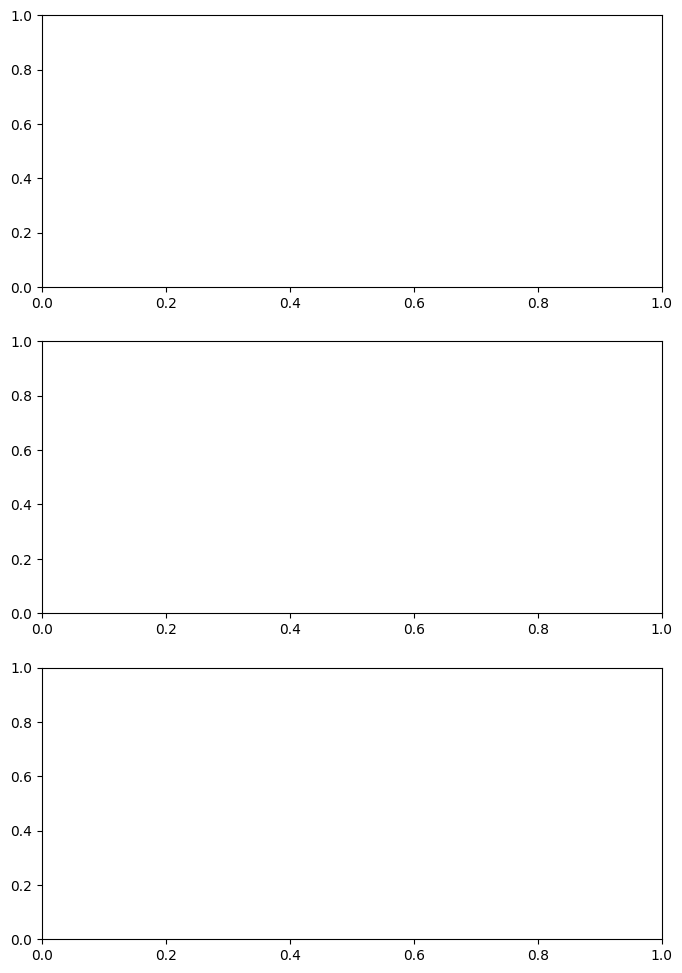

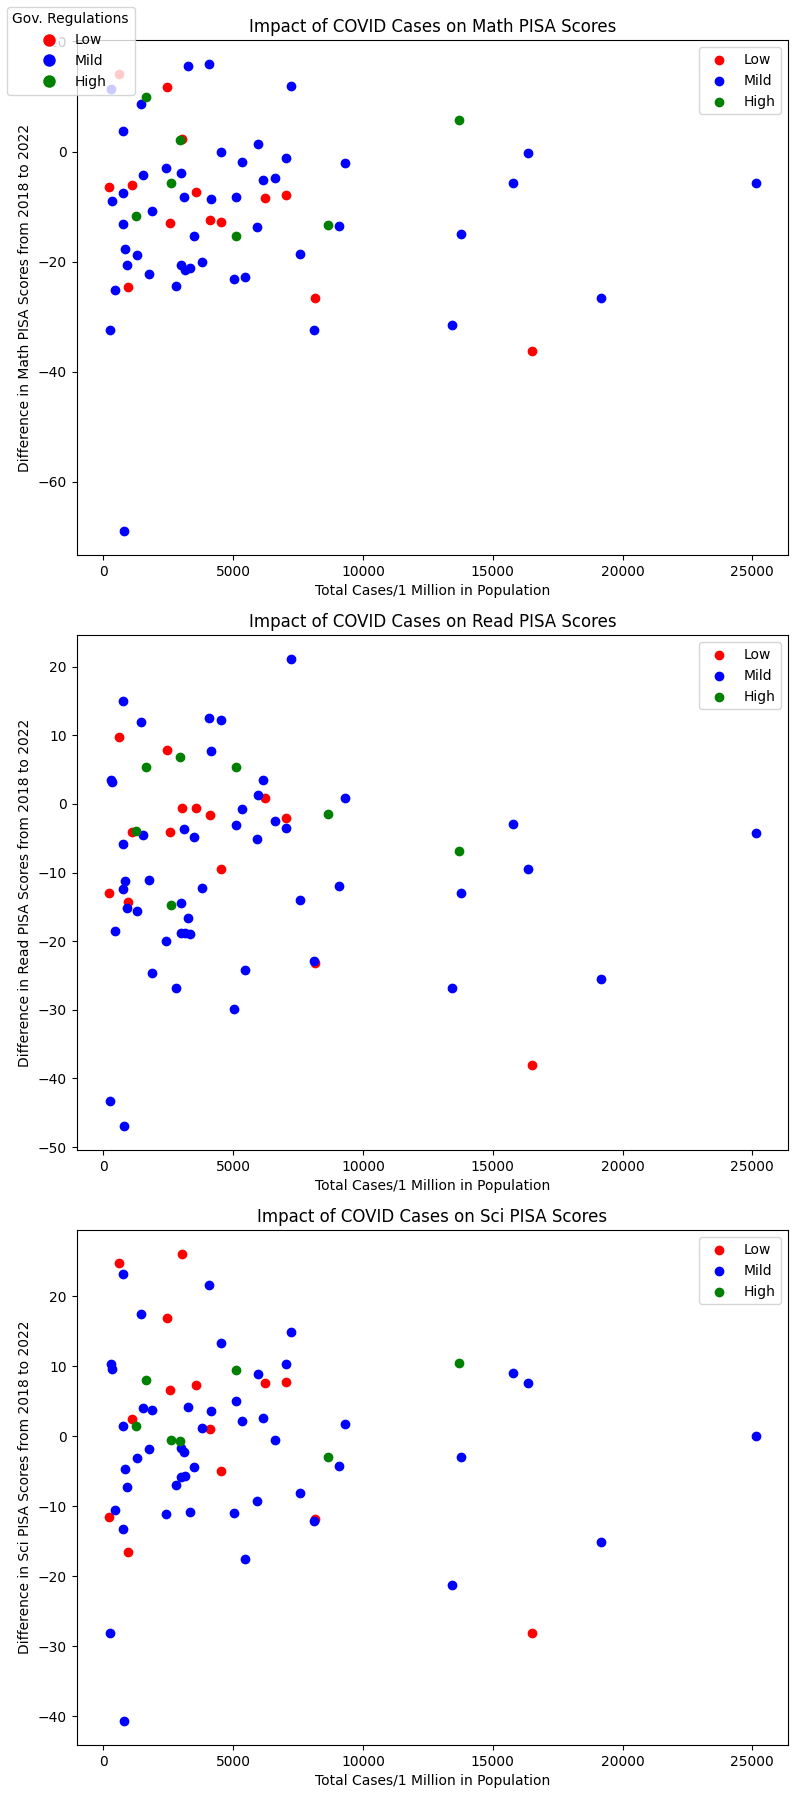

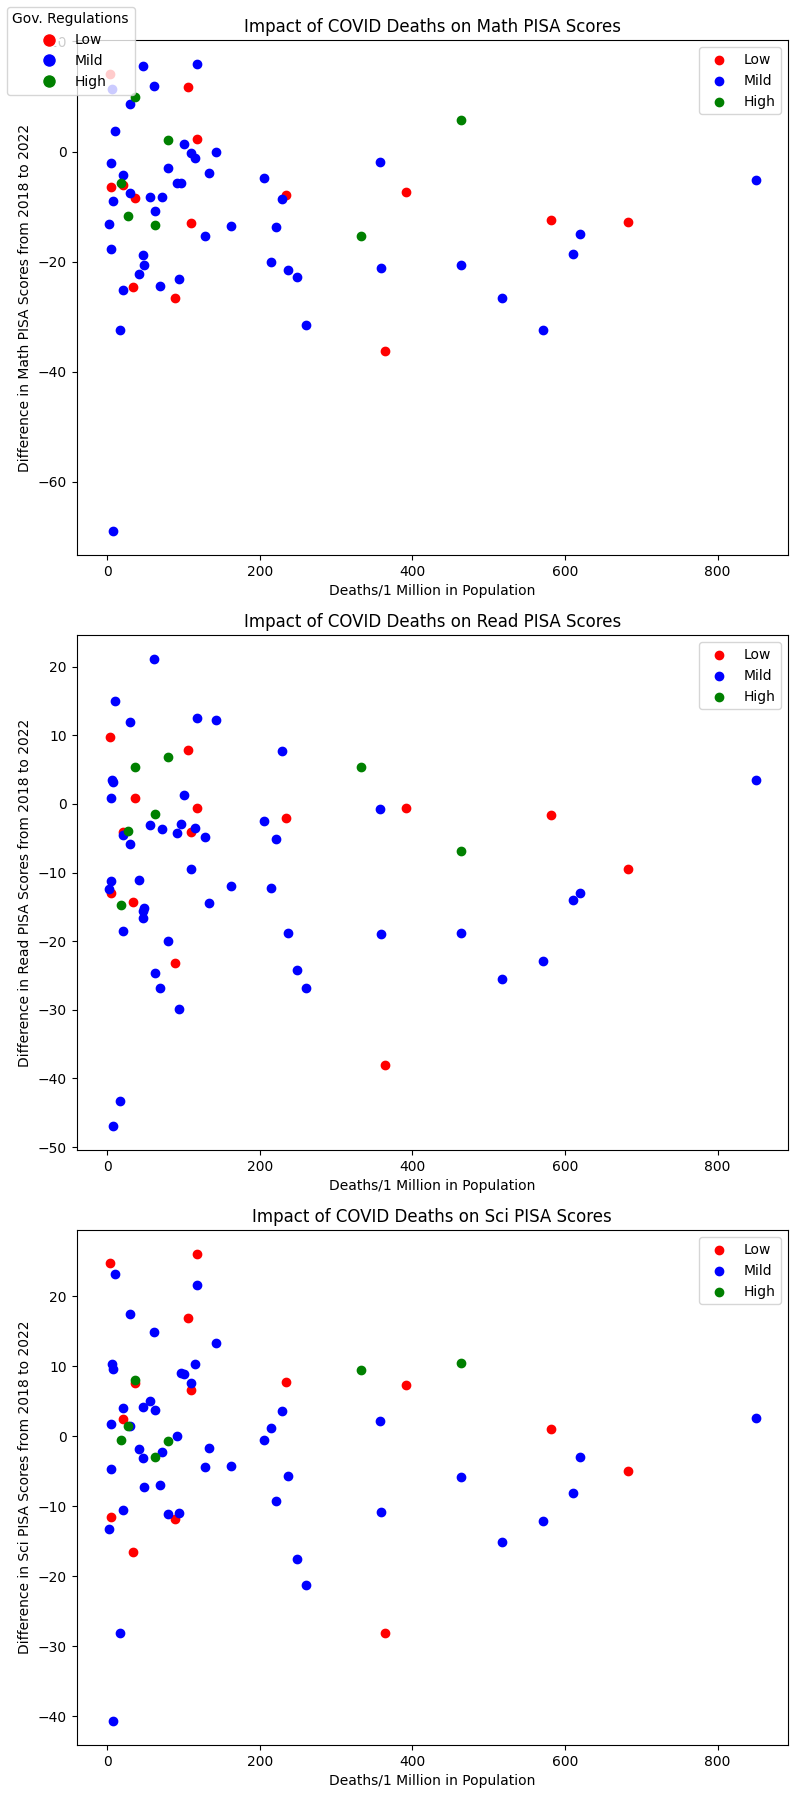

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#Ignore countries with incorrect data
ignore = ['XKS', 'MKD', 'MNE']
filtered = filtered[~filtered['codes'].isin(ignore)]

common = filtered['codes'].isin(df2['new'])

common_df = filtered[common]
not_common_df = filtered[~common]

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Adds to data frame with all the countries that have both COVID data and PISA score data (data combined from two data sets)
common_df['cases/pop'] = None
common_df.loc[common, 'cases/pop'] = df2['Tot Cases/1M pop']
common_df['deaths/pop'] = None
common_df.loc[common, 'deaths/pop'] = df2['Deaths/1M pop']
common_df.loc[common, 'Math'] = filtered['Math Score dif.']
common_df.loc[common, 'Read'] = filtered['Read Score dif.']
common_df.loc[common, 'Sci'] = filtered['Science Score dif.']
print(common_df)

common_df['codes'] = filtered['codes']

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

#Sorted countries into low, mild, or high based on a separate data set (not uploaded and analyzed in Python) detailing gov. stringency on COVID measures
sort = {'Low': ['CHE', 'CZE', 'DOM', 'GBR', 'IRL', 'ISL', 'KAZ', 'KHM', 'LTU', 'LVA', 'MDA', 'POL', 'SRB', 'THA'],
        'Mild': ['ALB',  'ARE', 'ARG', 'AUS', 'AZE', 'BEL', 'BGR', 'BRA', 'BRN', 'CAN', 'CHL', 'COL', 'CRI', 'CYP', 'DEU', 'DNK', 'EST', 'FIN', 'FRA', 'GEO', 'GRC', 'HKG', 'HRV',  'HUN', 'IDN', 'ISR', 'JPN', 'KOR', 'MAR', 'MEX', 'MLT', 'MYS', 'NLD', 'NOR', 'NZL', 'PAN', 'PER', 'PRT', 'PRY', 'QAT', 'ROU', 'SAU', 'SVK', 'SVN', 'SWE', 'TUR', 'TWN', 'URY'],
        'High': ['AUT', 'GTM', 'ITA', 'MAC', 'PHL', 'SGP', 'USA']}

fig, axes = plt.subplots(3, 1, figsize=(8, 18))
colors = {'Low': 'red', 'Mild': 'blue', 'High': 'green'}

# Loop over subjects and create scatter plots for cases per population
for ax, subject in zip(axes, ['Math', 'Read', 'Sci']):
    for category, countries in sort.items():
        ax.scatter(common_df.loc[common_df['codes'].isin(countries), 'cases/pop'],
                   common_df.loc[common_df['codes'].isin(countries), subject],
                   color=colors[category],
                   label=category)
    ax.set_xlabel('Total Cases/1 Million in Population')
    ax.set_ylabel(f'Difference in {subject} PISA Scores from 2018 to 2022')
    ax.set_title(f'Impact of COVID Cases on {subject} PISA Scores')
    ax.legend()

#Creates legend for color coding of low, medium or high gov. stringency categorization
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in colors.items()]
fig.legend(handles=legend_labels, title='Gov. Regulations', loc='upper left')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(3, 1, figsize=(8, 18))

# Loop over subjects and create scatter plots for deaths per population
for ax, subject in zip(axes, ['Math', 'Read', 'Sci']):
    for category, countries in sort.items():
        ax.scatter(common_df.loc[common_df['codes'].isin(countries), 'deaths/pop'],
                   common_df.loc[common_df['codes'].isin(countries), subject],
                   color=colors[category],
                   label=category)
    ax.set_xlabel('Deaths/1 Million in Population')
    ax.set_ylabel(f'Difference in {subject} PISA Scores from 2018 to 2022')
    ax.set_title(f'Impact of COVID Deaths on {subject} PISA Scores')
    ax.legend()

legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in colors.items()]
fig.legend(handles=legend_labels, title='Gov. Regulations', loc='upper left')

plt.tight_layout()
plt.show()
